# Chapter 02 - Digital Image Fundamentals

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Adição P/ Remoção De Ruido Aleatorio

In [2]:
#Load Image
lenna_path = r"../data/Lenna.png"
lenna_img  = cv2.imread(lenna_path)[..., ::-1]

In [3]:
def get_n_noisy_imgs(src, n_images=10, mean=0, std=10):
    """ Return a list of images with Gaussian noise. """

    lenna_imgs = []
    for idx in range(n_images):
        random_noise = np.random.normal(mean, std, lenna_img.shape).round()
        lenna_n      = (lenna_img + random_noise).clip(0, 255).astype(np.uint8)
        lenna_imgs.append(lenna_n)
        
    return lenna_imgs

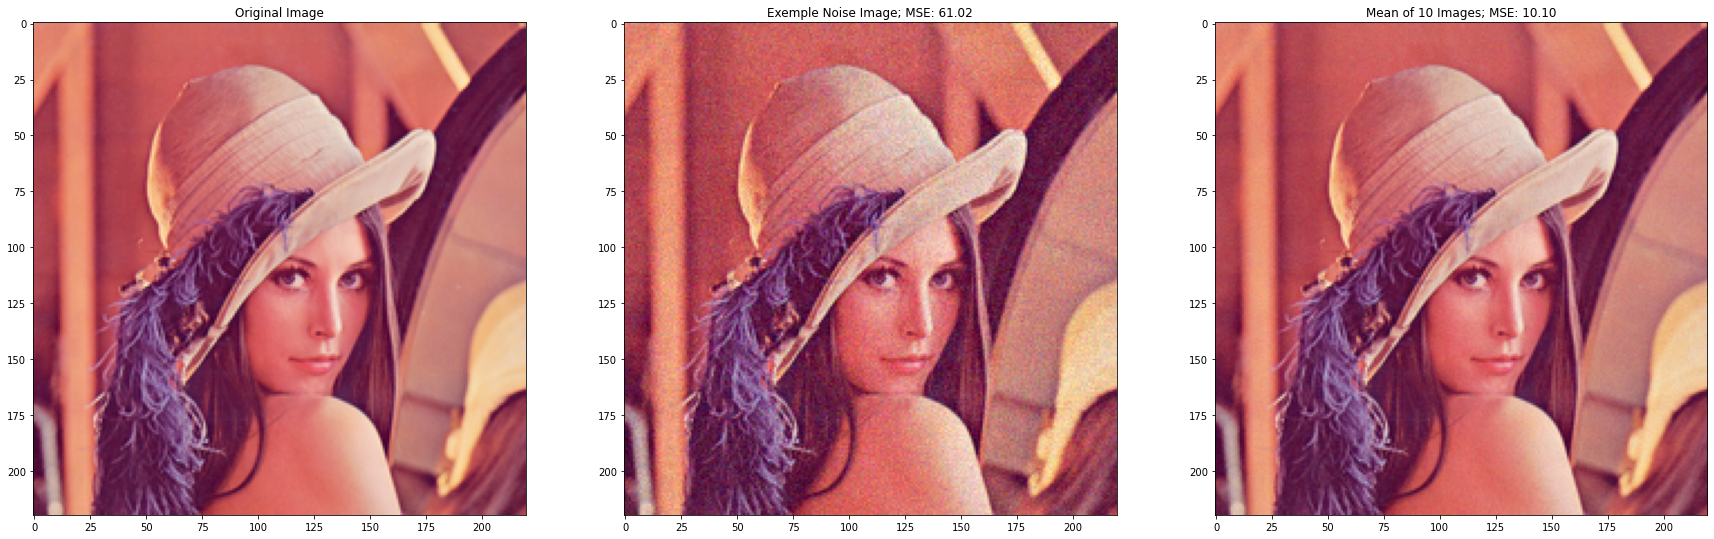

In [4]:
n_images   = 10
lenna_imgs = get_n_noisy_imgs(lenna_img, n_images)
mean_img   = (np.sum(lenna_imgs,axis=0)/len(lenna_imgs)).round().astype(np.uint8)

mse_noise = np.mean((lenna_img - lenna_imgs[0]) ** 2)
mse_mean  = np.mean((lenna_img - mean_img) ** 2)

plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.title("Original Image");
plt.imshow(lenna_img)
plt.subplot(132)
plt.title(f"Exemple Noise Image; MSE: {mse_noise:0.2f}")
plt.imshow(lenna_imgs[0].astype(np.uint8))
plt.subplot(133)
plt.title(f"Mean of {len(lenna_imgs)} Images; MSE: {mse_mean:0.2f}")
plt.imshow(mean_img)

## Plot MSE

In [5]:
n_images_list = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
mse = []
for n_images in n_images_list:
    lenna_imgs = get_n_noisy_imgs(lenna_img, n_images)
    mean_img   = (np.sum(lenna_imgs,axis=0)/len(lenna_imgs)).round().astype(np.uint8)

    mse_mean  = np.mean((lenna_img - mean_img) ** 2)
    mse.append(mse_mean)   

[]

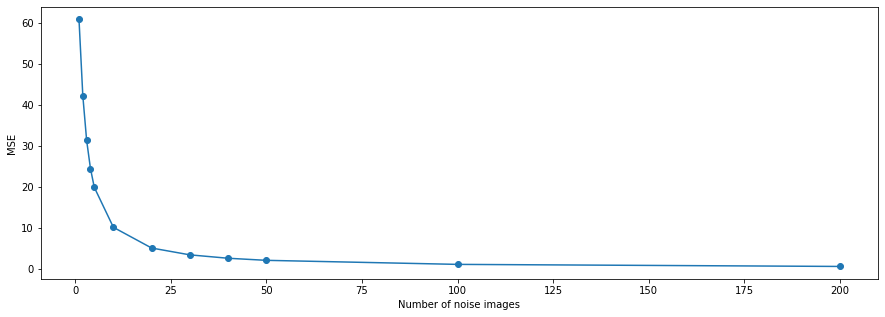

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(n_images_list, mse, marker='o')
plt.ylabel("MSE")
plt.xlabel('Number of noise images')
plt.plot()